# City cameras' coordinates in Rio de Janeiro - Data Cleaning

### Import Modules

In [1]:
cd ../

C:\Users\luisr\Desktop\Repositories\Data Science Projects\Hackaton COR IV - Centro de Operações do RJ\INCUBAÇÃO


In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns; sns.set()
from Modulos.decimals import correctMagnitude, dropBelowPrecision
from Modulos.geojson_conversion import points_geojson, save_json, pointsPolygonIds

C:\Users\luisr\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Load dataset

In [3]:
path_cameras = 'Dados/Cameras/Cameras_Smartluz - LAT-LONG.csv'
cameras = pd.read_csv(path_cameras, sep=';', encoding='cp1252', decimal='.')

coord_cols = ['Latitude', 'Longitude']
cameras.head()

,Codigo,Nome da Camera,Latitude,Longitude,Unnamed: 4
0,'000001',Av. Pres.Vargas X R. 1º Março,-22.900.259,-43.177.031,NaN
1,'000002',Av. Pres.Vargas X Av. Rio Branco,-22.901.392,-43.179.391,NaN
2,'000003',Av. Pres.Vargas X Pça. da República,-22.904.902,-43.190.353,NaN
3,'000004',Av. 20 de Janeiro X Terminal 1 - Brt,-22.809.417,-4.325.154.399,NaN
4,'000005',Av. Rio Branco X Av. Beira Mar,-22.913.741,-43.174.155,NaN


### Data Cleaning

In [4]:
cameras.drop('Unnamed: 4', axis=1, inplace=True)             # Drop empty column
cameras['Codigo'] = cameras['Codigo'].str.replace("'", '')   # Remove single quotes from id column

cameras.head()

,Codigo,Nome da Camera,Latitude,Longitude
0,000001,Av. Pres.Vargas X R. 1º Março,-22.900.259,-43.177.031
1,000002,Av. Pres.Vargas X Av. Rio Branco,-22.901.392,-43.179.391
2,000003,Av. Pres.Vargas X Pça. da República,-22.904.902,-43.190.353
3,000004,Av. 20 de Janeiro X Terminal 1 - Brt,-22.809.417,-4.325.154.399
4,000005,Av. Rio Branco X Av. Beira Mar,-22.913.741,-43.174.155


#### Remove additional dots in coordinates

In [5]:
def keep_first_dot(string):
    blocks = string.split('.')
    return blocks[0] + (('.' + ''.join(blocks[1:])) if len(blocks) > 1 else '')

for col in coord_cols:
    cameras[col] = cameras[col].astype(str).apply(keep_first_dot)

cameras[coord_cols].head()

,Latitude,Longitude
0,-22.900259,-43.177031
1,-22.901392,-43.179391
2,-22.904902,-43.190353
3,-22.809417,-4.325154399
4,-22.913741,-43.174155


#### Convert coordinates to float

In [6]:
cameras[coord_cols] = cameras[coord_cols].astype(float)

#### Correct decimal magnitude of coordinates

In [7]:
correct_magnitude = 1

# Correct order of magnitude of coordinates
for col in coord_cols:
    cameras[col] = correctMagnitude(cameras[col], mag=correct_magnitude)

cameras[coord_cols].head()

,Latitude,Longitude
0,-22.900259,-43.177031
1,-22.901392,-43.179391
2,-22.904902,-43.190353
3,-22.809417,-43.251544
4,-22.913741,-43.174155


#### Drop rows with missing values

In [8]:
print('Rows with missing values:', (cameras.isna().sum(1) != 0).sum())
cameras.dropna(inplace=True)

Rows with missing values: 14


---
## Get polygon id for each camera

In [9]:
import json
from matplotlib.path import Path as mpl_path

polygons_geojson_path = '../ACELERAÇÃO/Dados/Clusters/polygons_micro.geojson'

# Load custers polygons geojson data
polygons_geojson = json.loads(open(polygons_geojson_path, 'r').read())

cameras['cluster_id'] = points_poly_ids = pointsPolygonIds(cameras.copy(), polygons_geojson, ['Longitude', 'Latitude'], point_key_col='Codigo', polygon_key_col='sublabel')

---
## Save clean dataset

#### As csv

In [11]:
cameras.to_csv('Dados/Cameras/cameras.csv', index=False)

#### As geojson

In [43]:
save_json(points_geojson(cameras, ['Longitude', 'Latitude']), 'Dados/Cameras/cameras.geojson')

Done!


### Reload clean dataset

In [13]:
cameras = pd.read_csv('Dados/Cameras/cameras.csv')

cameras.head()

,Codigo,Nome da Camera,Latitude,Longitude,cluster_id
0,1,Av. Pres.Vargas X R. 1º Março,-22.900259,-43.177031,-1.0
1,2,Av. Pres.Vargas X Av. Rio Branco,-22.901392,-43.179391,-1.0
2,3,Av. Pres.Vargas X Pça. da República,-22.904902,-43.190353,-1.0
3,4,Av. 20 de Janeiro X Terminal 1 - Brt,-22.809417,-43.251544,-1.0
4,5,Av. Rio Branco X Av. Beira Mar,-22.913741,-43.174155,-1.0


In [44]:
# cameras = pd.read_csv('Dados/Cameras/cameras.csv')

cameras.head(10)

,Codigo,Nome da Camera,Latitude,Longitude,cluster_id
0,1,Av. Pres.Vargas X R. 1º Março,-22.900259,-43.177031,-1.0
1,2,Av. Pres.Vargas X Av. Rio Branco,-22.901392,-43.179391,-1.0
2,3,Av. Pres.Vargas X Pça. da República,-22.904902,-43.190353,-1.0
3,4,Av. 20 de Janeiro X Terminal 1 - Brt,-22.809417,-43.251544,-1.0
4,5,Av. Rio Branco X Av. Beira Mar,-22.913741,-43.174155,-1.0
5,6,Av. Rio Branco X Av. Alm. Barroso,-22.908029,-43.176985,-1.0
6,7,Av. 20 de Janeiro X Base da Guarda Municipal -...,-22.815593,-43.242096,-1.0
7,8,R. Visconde Do Rio Branco X R. Dos Inválidos -...,-22.908246,-43.186069,-1.0
8,9,Av. Presidente Antonio Carlos X Av. Almirante ...,-22.906766,-43.172901,-1.0
9,10,R. Santana X R. Frei Caneca - FIXA,-22.911155,-43.193351,-1.0


---
## Exploratory Data Analysis

In [39]:
n_cams_inside = len(cameras['cluster_id'].unique()) - 1

print('Polygons with cameras:', n_cams_inside)

Polygons with cameras: 40


#### Cameras inside polygons

In [40]:
_sum, mean = (cameras['cluster_id'] != -1).agg([np.sum, np.mean])

print('Cameras inside polygons:', int(_sum), f'({round(mean*100, 2)})%')

Cameras inside polygons: 107 (3.77)%


#### Number of critical regions per number of cameras

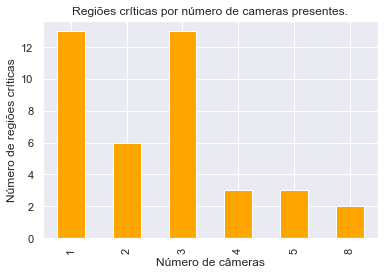

In [14]:
ax = cameras['cluster_id'].value_counts().drop(-1).value_counts().sort_index().plot.bar(color='orange')
ax.set(xlabel='Número de câmeras', ylabel='Número de regiões críticas', title='Regiões críticas por número de cameras presentes.')
plt.show()

### Cameras inside polygons dataset

In [49]:
insiders = cameras[cameras['cluster_id'] != -1]

insiders.head()

,Codigo,Nome da Camera,Latitude,Longitude,cluster_id
31,32,Av. Epitácio Pessoa X R. Maria Quitéria,-22.980723,-43.207148,60.0
39,40,Praça Tiradentes,-22.906984,-43.182051,43.0
43,44,R. Jardim Botânico X R. Pacheco Leão,-22.966390,-43.219492,30.0
73,74,Boulevard 28 de Setembro X R. Felipe Camarão,-22.913827,-43.235707,32.0
76,77,R. Teodoro da Silva X R. Barão de São Francisco,-22.918600,-43.251042,72.0


In [50]:
insiders.to_csv('Dados/Cameras/cameras_bolsões.csv', index=False)